# 라이브러리 로드

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# 구버전 주피터 노트북을 위해 씀
%matplotlib inline 

# 데이터셋 로드

In [3]:
df = pd.read_csv('diabetes.csv')
df.shape

(768, 9)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# 학습, 예측 데이터셋 나누기

In [29]:
# 8:2 비율로 나누기
feature_names = df.columns[:-1].tolist()
target_name = df.columns[-1]

#data = df.drop(['Outcome'], axis=1)
X = df[df.columns[:-1]]
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state=111)

In [37]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
13,1,189,60,23,846,30.1,0.398,59
431,3,89,74,16,85,30.4,0.551,38
87,2,100,68,25,71,38.5,0.324,26
132,3,170,64,37,225,34.5,0.356,30
597,1,89,24,19,25,27.8,0.559,21


In [39]:
y_train.head()

13     1
431    0
87     0
132    1
597    0
Name: Outcome, dtype: int64

# DecisionTree 시작

In [43]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

In [45]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [48]:
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 0, 0, 0], dtype=int64)

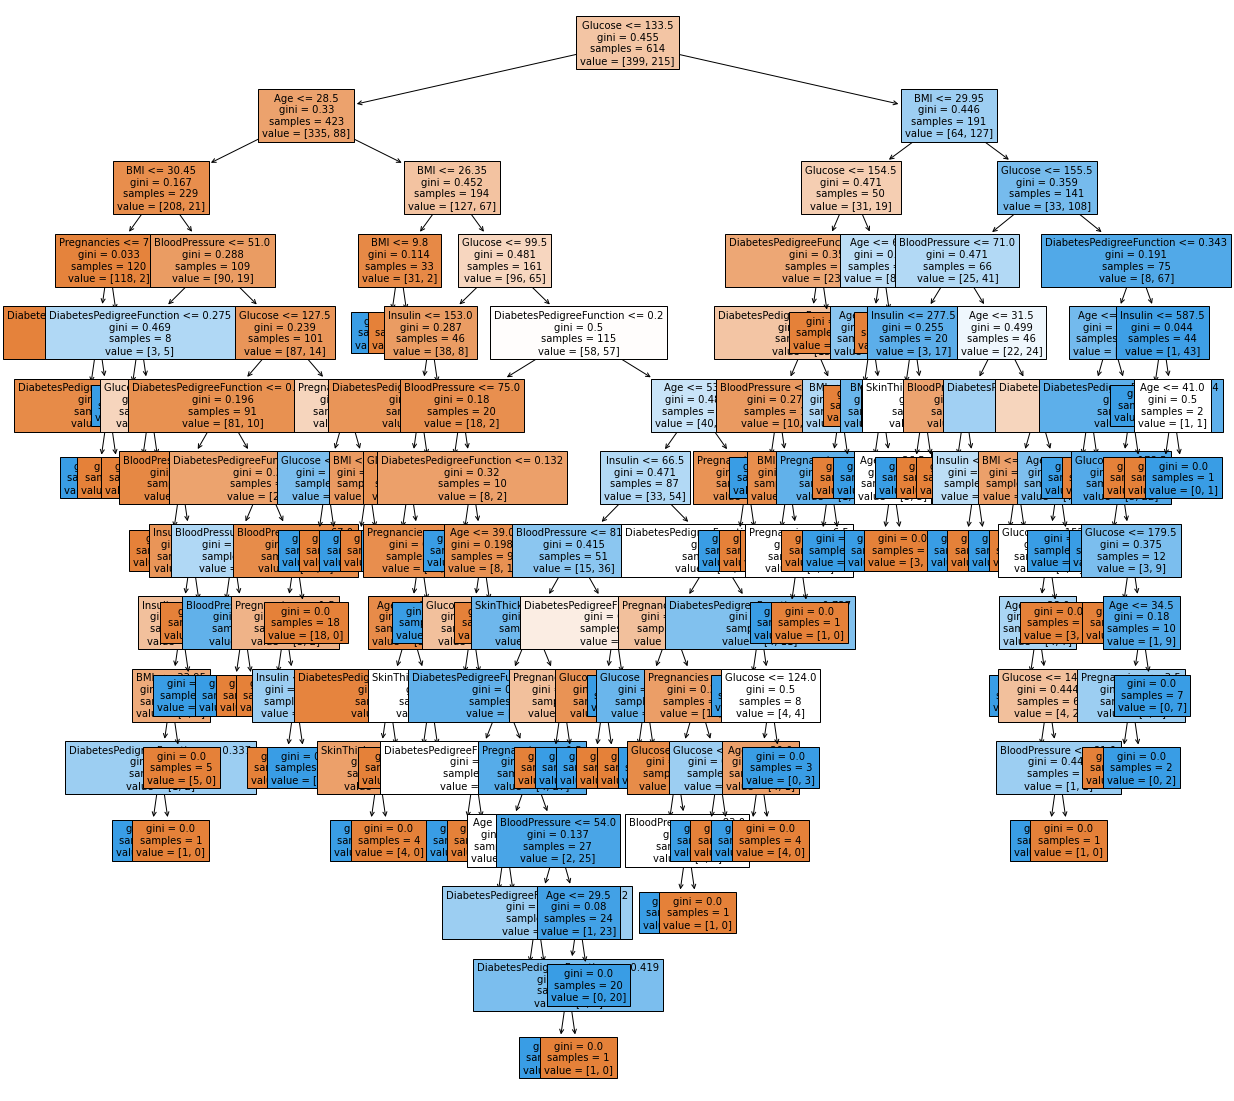

In [53]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
tree = plot_tree(model, feature_names=feature_names,
                 filled=True, fontsize=10)

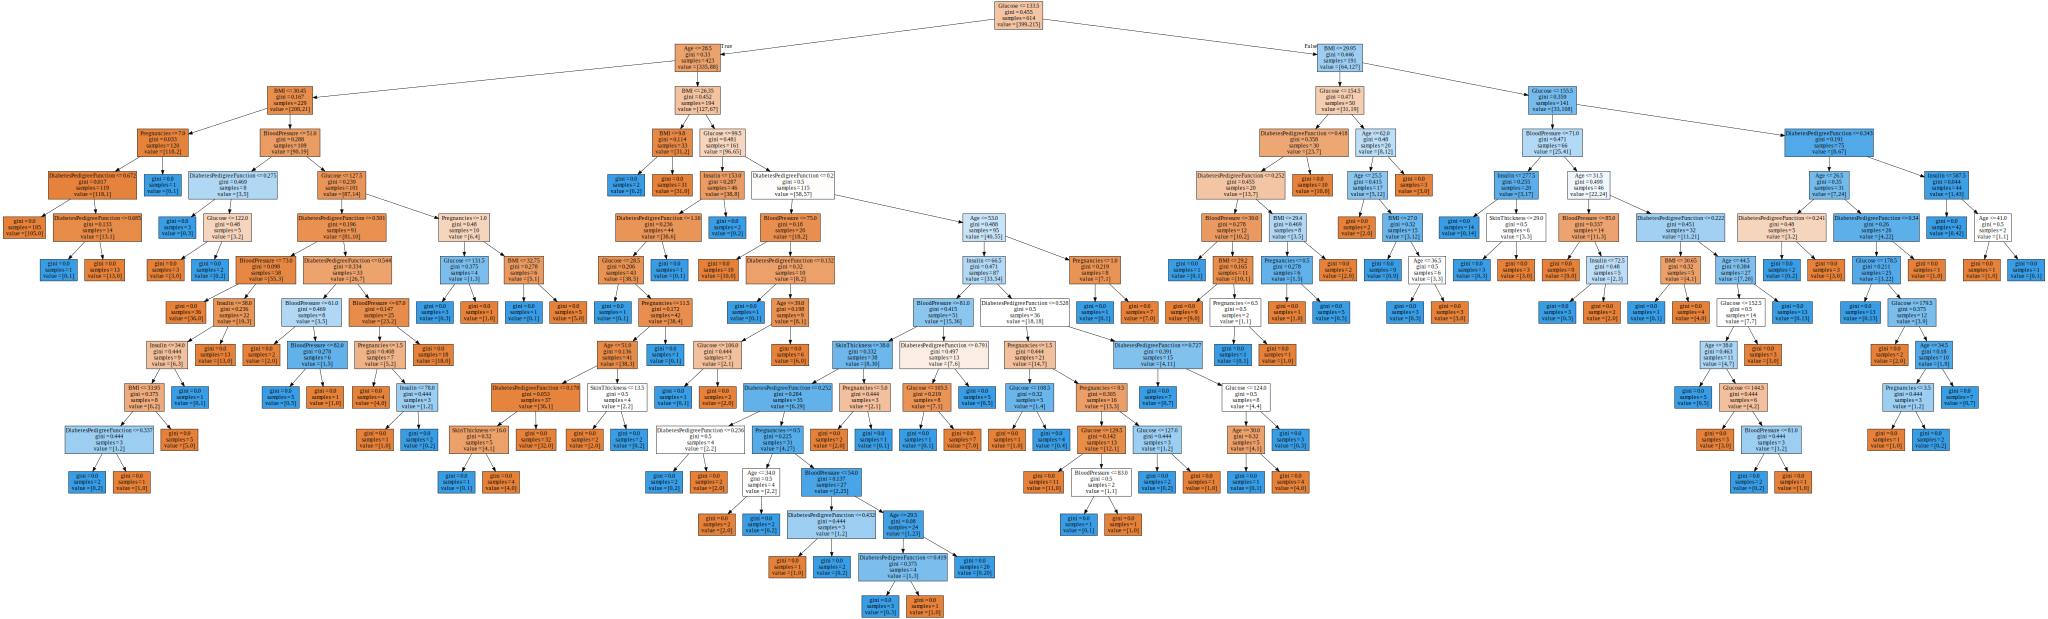

In [54]:
import graphviz
from sklearn.tree import export_graphviz

dot_tree = export_graphviz(model,
                           feature_names=feature_names,
                           filled=True)
graphviz.Source(dot_tree)

In [57]:
# feature의 중요도 추출

imp = model.feature_importances_

<AxesSubplot:>

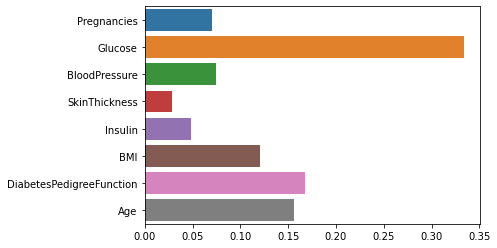

In [58]:
# feature의 중요도 시각화

sns.barplot(x=imp, y=feature_names)

# Accuracy 측정하기

In [69]:
diff_count = abs(y_test - y_predict).sum()
diff_count
# 다르게 예측 된 것이 48개

48

In [75]:
(len(y_test) - diff_count) / len(y_test) * 100

68.83116883116884

In [76]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict) *100

68.83116883116884

In [79]:
model.score(X_test, y_test) *100

68.83116883116884